# 3D Deconvolution Benchmark: Julia

---
## Setup

In [3]:
using DeconvOptim, Images, FFTW, Noise, ImageView, BenchmarkTools

---
## Test Image



In [5]:
img = convert(Array{Float32}, channelview(load("simple_3d_ball.tif")));

Loading: 100%|███████████████████████████████████████████| Time: 0:00:01


In [6]:
psf = ifftshift(convert(Array{Float32}, channelview(load("simple_3d_psf.tif"))));

In [7]:
# psf ./= sum(psf)
# # create a blurred, noisy version of that image
# img_b = conv(img, psf, [1, 2, 3])
# img_n = poisson(img_b, 300);
# save("simple_3d_ball_blurred.tif", img_n)

In [8]:
img_n = convert(Array{Float32}, channelview(load("simple_3d_ball_blurred.tif")));

In [9]:
reg = TV(num_dims=3, sum_dims=[1, 2, 3]);

In [10]:
res2, ores = deconvolution(img_n, psf, regularizer=reg, loss=Poisson(),
                          λ=0.05, padding=0, iterations=10);

In [11]:
@benchmark deconvolution(img_n, psf, regularizer=reg, loss=Poisson(), λ=0.05, padding=0, iterations=10)  samples=100 evals=1 seconds=60

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  129.998 ms … 368.080 ms  ┊ GC (min … max):  0.00% … 62.01%
 Time  (median):     177.161 ms               ┊ GC (median):    25.88%
 Time  (mean ± σ):   223.224 ms ±  91.995 ms  ┊ GC (mean ± σ):  41.07% ± 23.59%

   ▁▅        ▅█                                          ▁▅      
  ███▆▁▃▁▁▁▁▃███▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁████▁▃ ▃
  130 ms           Histogram: frequency by time          363 ms <

 Memory estimate: 147.59 MiB, allocs estimate: 2671.

In [12]:
res, ores = deconvolution(img_n, psf, regularizer=nothing, iterations=10);

In [13]:
@benchmark deconvolution(img_n, psf, regularizer=nothing, iterations=10) samples=100 evals=1 seconds=60

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  107.933 ms … 330.723 ms  ┊ GC (min … max):  0.00% … 66.75%
 Time  (median):     113.915 ms               ┊ GC (median):     3.51%
 Time  (mean ± σ):   124.296 ms ±  43.050 ms  ┊ GC (mean ± σ):  11.55% ± 13.36%

   █▃                                                            
  ███▃▁▁▁▁▁▁▁▁▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃ ▂
  108 ms           Histogram: frequency by time          330 ms <

 Memory estimate: 93.57 MiB, allocs estimate: 2207.

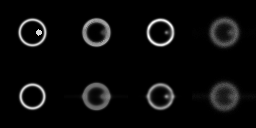

In [37]:
img_comb1 = [img[:, : ,32] res2[:, :, 32] res[:, :, 32] img_n[:, :, 32]]
img_comb2 = [img[:, : ,38] res2[:, :, 38] res[:, :, 38] img_n[:, :, 38]]

img_comb = cat(img_comb1, img_comb2, dims=1)
img_comb ./= maximum(img_comb)

# imshow([img[:, :, 20:end] res2[:, :, 20:end] res[:, :, 20:end] img_n[:, :, 20:end]])
colorview(Gray, img_comb)

---
## Cell 3D

In [166]:
cell = convert(Array{Float32}, channelview(load("cells3d_convolved.tiff")));

In [168]:
cell_psf = convert(Array{Float32}, channelview(load("cells3d_psf.tiff")));

In [178]:
cell /= maximum(cell);
cell_psf /= maximum(cell_psf);

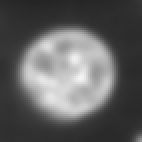

In [180]:
colorview(Gray, cell[:,:,30])

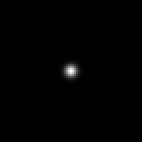

In [182]:
colorview(Gray, cell_psf[:,:,30])

In [184]:
cell_res, cell_ores = deconvolution(cell, ifftshift(cell_psf), regularizer=nothing, iterations=10);

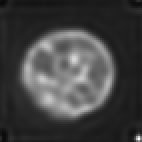

In [188]:
colorview(Gray, cell_res[:,:,30]/maximum(cell_res[:,:,30]))

In [190]:
@benchmark deconvolution(cell, ifftshift(cell_psf), regularizer=nothing, iterations=10) samples=100 evals=1 seconds=60

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  556.957 ms … 816.374 ms  ┊ GC (min … max): 0.54% … 29.84%
 Time  (median):     574.867 ms               ┊ GC (median):    0.71%
 Time  (mean ± σ):   582.567 ms ±  41.177 ms  ┊ GC (mean ± σ):  2.21% ±  5.02%

     ▄█                                                          
  ▆▄▅██▆▅▂▃▂▂▁▂▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▂ ▂
  557 ms           Histogram: frequency by time          814 ms <

 Memory estimate: 105.89 MiB, allocs estimate: 2196.